In [163]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import matplotlib.ticker as tck
import os
sns.set_context("paper", rc = {'lines.markersize': 12})
# sns.set(font_scale = 1.2)
sns.set_style("ticks")
# sns.set_palette("deep")
sns.set_palette("twilight_shifted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Typewriter"
})

In [164]:
data_csv = "./data.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df['ratio'] = data_df['time'] / data_df['model']
data_df

,simulation,analysis,data,node,scenario,time,model,ratio
0,1,4,4,128,ideal,5.2387,5.062746,1.034755
1,1,4,4,128,transit,289.7234,5.649786,51.280417
2,1,4,4,128,increasing0.25,72.8439,5.619089,12.963650
3,1,4,4,128,increasing0.5,145.0354,5.527623,26.238295
4,1,4,4,128,increasing0.75,NaN,5.555319,NaN
...,...,...,...,...,...,...,...,...
155,8,4,4,128,increasing0.5,1157.9848,39.646707,29.207591
156,8,4,4,128,increasing0.75,1733.8893,43.384844,39.965323
157,8,4,4,128,decreasing0.25,578.6900,38.223264,15.139733
158,8,4,4,128,decreasing0.5,1157.9848,39.646707,29.207591


In [165]:
!export PATH="/home/tudo/.vscode-server/bin/dfd34e8260c270da74b5c2d86d61aee4b6d56977/bin/remote-cli:/home/tudo/software/opt/texlive/bin/x86_64-linux:/home/tudo/software/opt/wrench/bin:/home/tudo/software/opt/simgrid/bin:/home/tudo/software/install/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/tudo/.local/bin:/home/tudo/.local/bin"
!echo $PATH
!which latex

/usr/bin:/home/cc/.vscode-server/bin/dfd34e8260c270da74b5c2d86d61aee4b6d56977/bin/remote-cli:/home/cc/software/install/texlive/bin/x86_64-linux:/home/cc/software/install/wrench/bin:/home/cc/software/install/simgrid/bin:/home/cc/software/opt/bin:/home/cc/.local/bin:/home/cc/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin
~/software/install/texlive/bin/x86_64-linux/latex


In [166]:
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':128}]
parameters = ['simulation', 'analysis', 'data', 'node']

In [167]:
@interact(variation=variations)
def plot(variation):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    sub_df = data_df[condition]
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[0])
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2 = sns.lineplot(x=variable, y='ratio', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[1])
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

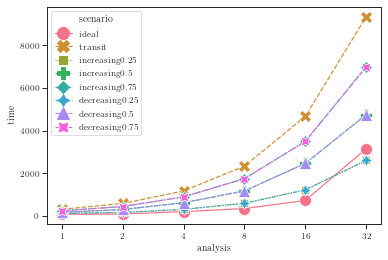

In [168]:
analysis_df = data_df[(data_df['simulation'] == 4) & (data_df['data'] == 4) & (data_df['node'] == 16)]
ax = sns.lineplot(x='analysis', y='time', hue='scenario', style='scenario', data=analysis_df, markers=True)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))

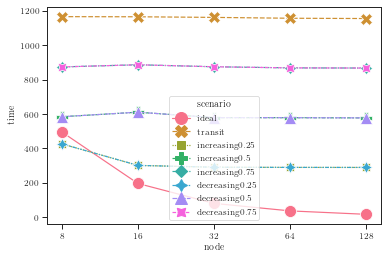

In [169]:
node_df = data_df[(data_df['simulation'] == 4) & (data_df['data'] == 4) & (data_df['analysis'] == 4)]
ax = sns.lineplot(x='node', y='time', hue='scenario', style='scenario', data=node_df, markers=True)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))

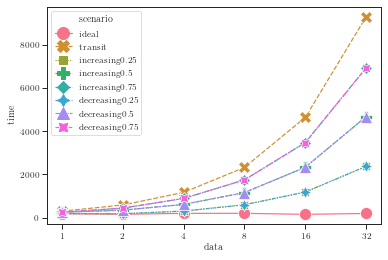

In [170]:
size_df = data_df[(data_df['simulation'] == 4) & (data_df['analysis'] == 4) & (data_df['node'] == 16)]
ax = sns.lineplot(x='data', y='time', hue='scenario', style='scenario', data=size_df, markers=True)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))

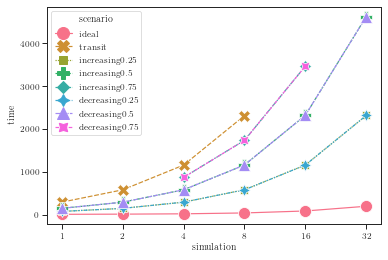

In [171]:
simulation_df = data_df[(data_df['data'] == 4) & (data_df['analysis'] == 4) & (data_df['node'] == 128)]
ax = sns.lineplot(x='simulation', y='time', hue='scenario', style='scenario', data=simulation_df, markers=True)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))